In [4]:
import numpy as np
# show the point in drawings
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
x = np.array([1.0, 2.0, 3.0])
y = np.array([1.0, 2.0, 3.0])

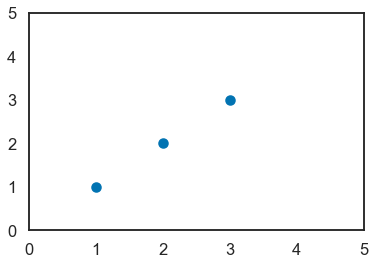

In [7]:
sns.set(style='white', context='talk', palette='colorblind')
plt.scatter(x, y)
heightOfCanvas = 5
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

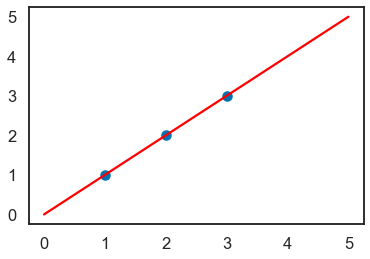

In [8]:
plt.scatter(x, y)
x = [0.0, heightOfCanvas]
plt.plot(x, x, color='red')
plt.show()

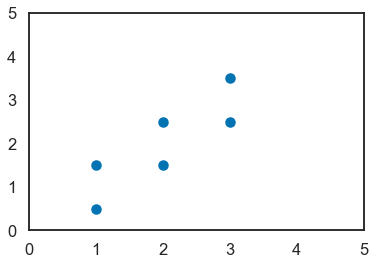

In [9]:
x = np.array([1.0, 1.0, 2.0, 2.0, 3.0, 3.0])
offset = 0.5
y = x + offset * np.array([-1.0, 1.0, -1.0, 1.0, -1.0, 1.0])
plt.scatter(x, y)
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

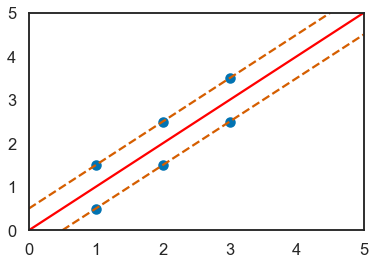

In [10]:
plt.scatter(x, y)

# dotted line 1
x1 = np.array([0.0, heightOfCanvas-offset])
y1 = np.array([offset, heightOfCanvas])
plt.plot(x1, y1, 'r--')

# dotted line 2
x2 = np.array([offset, heightOfCanvas])
y2 = np.array([0, heightOfCanvas-offset])
plt.plot(x2, y2, 'r--')

#plt.plot()
x3 = [0.0, heightOfCanvas]
plt.plot(x3, x3, color='red')
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

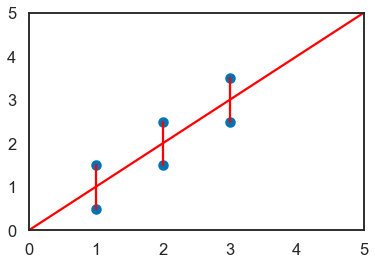

In [11]:
plt.scatter(x, y)
plt.plot(x3, x3, color='red')

# show distance between points and solid lines
for i in range(x.size):
    x_1_temp = x[i]
    y_1_temp = y[i]
    x_2_temp = x[i]
    y_2_temp = x[i]
    plt.plot(np.array([x_1_temp, x_2_temp]), np.array([y_1_temp, y_2_temp]), color='red')

plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

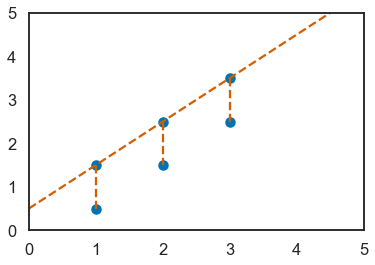

In [12]:
plt.scatter(x, y)
plt.plot(x1, y1, 'r--')

# show distance between points and solid lines
for i in range(x.size):
    if i % 2 == 0:
        continue
    x_1_temp = x[i]
    y_1_temp = y[i]
    x_2_temp = x[i]
    y_2_temp = 2 * x[i] - y[i]
    plt.plot(np.array([x_1_temp, x_2_temp]), np.array([y_1_temp, y_2_temp]), 'r--')

plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

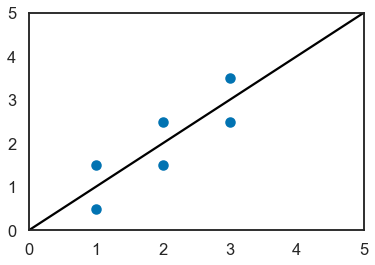

In [60]:
# code are from https://blog.csdn.net/jayloncheng/article/details/80300724
m = len(x);sum_x = np.sum(x);sum_y = np.sum(y);sum_xy = np.sum(x * y);sum_xx = np.sum(x * x)
a = (sum_y * sum_xx - sum_x * sum_xy) / (m * sum_xx - sum_x ** 2)
b = (m * sum_xy - sum_x * sum_y) / (m * sum_xx - sum_x * sum_x)
plt.scatter(x, y)
true_x = np.array([0.0, heightOfCanvas])
true_y = np.array([a, a + b * heightOfCanvas])
plt.plot(true_x, true_y, color='black')
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

In [75]:
import tensorflow as tf
from tensorflow import keras

# prepare model
epoch = 100
efficientOfA = -5    # to initialize the function as y = 5 - x
model = keras.Sequential([keras.layers.Dense(1, input_shape=(2,), use_bias=False, kernel_initializer=keras.initializers.Constant(-1.0), name='layer1')])
model.compile(optimizer=keras.optimizers.Adam(0.1, 0.8), loss='mean_squared_error')
model.build(input_shape=[2])

# train
model.fit(np.dstack((np.ones(m) * efficientOfA, x))[0], y, batch_size=1, epochs=epoch)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 4.0585
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 3.3131
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 3.0763
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 2.6005
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 2.3317
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7363
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6363
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2816
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 1.6352
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0047
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9374
Epoch 12/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9420
Epoch 13/100
6/6 [==============================] - 0s 3ms/st

[array([[0.02830518],
       [1.0154738 ]], dtype=float32)]


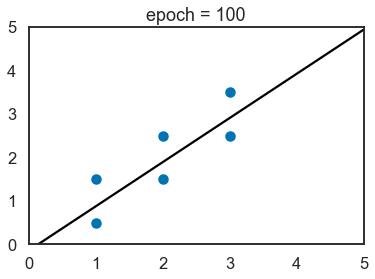

In [76]:
# get the weights and show it in drawings
weights = model.get_layer('layer1').get_weights()
print (weights)
a = weights[0][0];b = weights[0][1]
plt.scatter(x, y)
true_x = np.array([0.0, heightOfCanvas])
true_y = np.array([efficientOfA * a, efficientOfA * a + b * heightOfCanvas])
plt.plot(true_x, true_y, color='black')
plt.title("epoch = %s" % str(epoch))
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()